# RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3]
df2=df2[df2.columns[cols]]

In [4]:
# sorting the dataframe
df3=df2.sort_values("start_time")
df3.head()

,trip_duration
start_time,
2013-06-30 11:04:00,1538
2013-06-30 11:35:00,1108
2013-06-30 11:55:00,2063
2013-06-30 12:03:00,775
2013-06-30 12:15:00,784


<AxesSubplot:xlabel='start_time'>

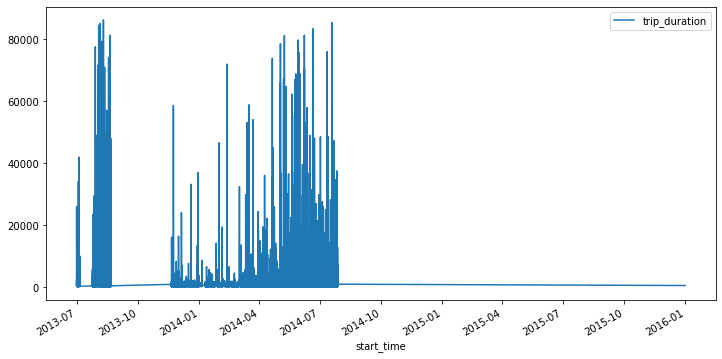

In [5]:
df3.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
# results=seasonal_decompose(df3['trip_duration'])
# results.plot()

In [9]:
len(df3)

76000

In [12]:
train=df3.iloc[:75000]
test=df3.iloc[75000:]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [14]:
df3.head(),df3.tail()

(                     trip_duration
 start_time                        
 2013-06-30 11:04:00           1538
 2013-06-30 11:35:00           1108
 2013-06-30 11:55:00           2063
 2013-06-30 12:03:00            775
 2013-06-30 12:15:00            784,
                      trip_duration
 start_time                        
 2014-07-27 19:17:00            183
 2014-07-27 19:18:00            421
 2014-07-27 19:18:00           1150
 2014-07-27 19:19:00            951
 2015-12-31 17:35:00            521)

In [15]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [16]:
scaled_train[:10]

array([[0.01717207],
       [0.01217614],
       [0.02327176],
       [0.00830719],
       [0.00841176],
       [0.00898106],
       [0.00160335],
       [0.02083188],
       [0.01344255],
       [0.01943767]])

In [18]:
pip install tensorflow

     ------------------------------------ 266.3/266.3 MB 374.7 kB/s eta 0:00:00

     ---------------------------------------- 6.0/6.0 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 3.0 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.7/1.7 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.2 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 2.6/2.6 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-no

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
# define generator
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [25]:
X,y=generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.01717207 0.01217614 0.02327176]
Predict this y: 
 [[0.00830719]]


In [26]:
X.shape

(1, 3, 1)

In [27]:
# we do the same thing, but now instead for 12 timestamps
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [29]:
# define model
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
74988/74988 [==============================] - 668s 9ms/step - loss: 7.3007e-04
Epoch 2/50
74988/74988 [==============================] - 380s 5ms/step - loss: 7.2796e-04
Epoch 3/50
74988/74988 [==============================] - 403s 5ms/step - loss: 7.2579e-04
Epoch 4/50
74988/74988 [==============================] - 440s 6ms/step - loss: 7.2523e-04
Epoch 5/50
74988/74988 [==============================] - 418s 6ms/step - loss: 7.2464e-04
Epoch 6/50
74988/74988 [==============================] - 401s 5ms/step - loss: 7.2466e-04
Epoch 7/50
74988/74988 [==============================] - 389s 5ms/step - loss: 7.2389e-04
Epoch 8/50
74988/74988 [==============================] - 390s 5ms/step - loss: 7.2378e-04
Epoch 9/50
74988/74988 [==============================] - 373s 5ms/step - loss: 7.2375e-04
Epoch 10/50
74988/74988 [==============================] - 314s 4ms/step - loss: 7.2306e-04
Epoch 11/50
74988/74988 [==============================] - 307s 4ms/step - loss: 7.2303e-

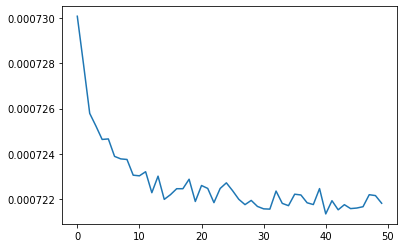

In [32]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [33]:
last_train_batch=scaled_train[-12:]

In [34]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [35]:
model.predict(last_train_batch)

1/1 [==============================] - 11s 11s/step


array([[0.01540671]], dtype=float32)

In [36]:
scaled_test[0]

array([0.01374463])

In [40]:
test_predictions=[]

first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred=model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred)
    
    # use the prediction to update the batch and remove the first value
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 40ms/step


In [41]:
test_predictions

[array([0.01540671], dtype=float32),
 array([0.01596815], dtype=float32),
 array([0.01607532], dtype=float32),
 array([0.01627658], dtype=float32),
 array([0.01593569], dtype=float32),
 array([0.01605072], dtype=float32),
 array([0.01630797], dtype=float32),
 array([0.01607742], dtype=float32),
 array([0.016419], dtype=float32),
 array([0.01644922], dtype=float32),
 array([0.01686941], dtype=float32),
 array([0.01731522], dtype=float32),
 array([0.0178292], dtype=float32),
 array([0.01796485], dtype=float32),
 array([0.01808134], dtype=float32),
 array([0.01819434], dtype=float32),
 array([0.01830027], dtype=float32),
 array([0.01842251], dtype=float32),
 array([0.01854159], dtype=float32),
 array([0.01865175], dtype=float32),
 array([0.01877351], dtype=float32),
 array([0.01888305], dtype=float32),
 array([0.01899347], dtype=float32),
 array([0.01908895], dtype=float32),
 array([0.01916876], dtype=float32),
 array([0.01923022], dtype=float32),
 array([0.01928767], dtype=float32),
 arr

In [42]:
test.head()

,trip_duration
start_time,
2014-07-26 15:54:00,1243
2014-07-26 15:54:00,2742
2014-07-26 15:55:00,1201
2014-07-26 15:57:00,2199
2014-07-26 15:58:00,1597


In [47]:
true_predictions=scaler.inverse_transform(test_predictions)

In [51]:
test['Predictions']=true_predictions

<AxesSubplot:xlabel='start_time'>

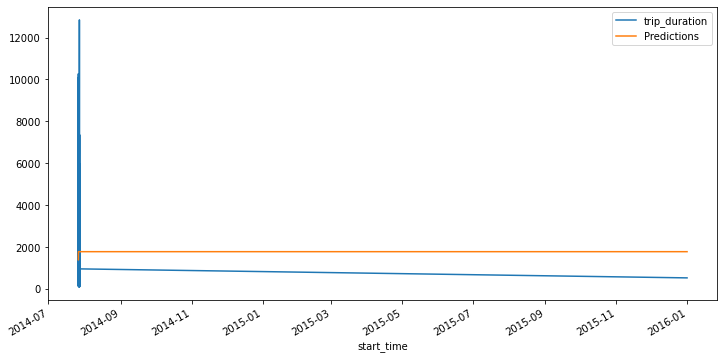

In [49]:
test.plot(figsize=(12,6))

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['trip_duration'],test['Predictions']))
print(rmse)

1268.496450411149
